In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
data=pd.read_excel("/content/clean_train.xlsx")
data.head()

,Product Name,Review,Rating,Sentiment
0,kapiva tulsi anti-hair fall oil for unisex adu...,mild fragrance authentic ayurvedic product non...,5,Positive
1,kapiva tulsi anti-hair fall oil for unisex adu...,good product look bottle really amazing,4,Positive
2,kapiva tulsi anti-hair fall oil for unisex adu...,ordered kapiva hair oil pure natural toxin fre...,5,Positive
3,kapiva tulsi anti-hair fall oil for unisex adu...,fragrance also good think try well,5,Positive
4,kapiva tulsi anti-hair fall oil for unisex adu...,Please dont buy product reducing hairfalli wri...,1,Negative


In [ ]:
data['Review'] = data['Review'].apply(str)

In [ ]:
import spacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    # Process the sentence with SpaCy
    doc = nlp(sentence)
    # Lemmatize each token in the sentence and return the lemmatized tokens
    return [token.lemma_ for token in doc]

# Apply lemmatization to each sentence in the 'Review' column
data['Tokens'] = data['Review'].apply(lambda sentence: lemmatize_sentence(sentence))

# Display the modified DataFrame
print(data.head())


                                        Product Name  \
0  kapiva tulsi anti-hair fall oil for unisex adu...   
1  kapiva tulsi anti-hair fall oil for unisex adu...   
2  kapiva tulsi anti-hair fall oil for unisex adu...   
3  kapiva tulsi anti-hair fall oil for unisex adu...   
4  kapiva tulsi anti-hair fall oil for unisex adu...   

                                              Review  Rating Sentiment  \
0  mild fragrance authentic ayurvedic product non...       5  Positive   
1            good product look bottle really amazing       4  Positive   
2  ordered kapiva hair oil pure natural toxin fre...       5  Positive   
3                 fragrance also good think try well       5  Positive   
4  Please dont buy product reducing hairfalli wri...       1  Negative   

                                              Tokens  
0  [mild, fragrance, authentic, ayurvedic, produc...  
1     [good, product, look, bottle, really, amazing]  
2  [order, kapiva, hair, oil, pure, natural, toxi... 

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Description about the dataset
print("\n Total No. of Reviews: ", len(data['Review']))
print("\n Total No. of Unique Brands", len(list(set(data['Product Name'].unique()))))


 Total No. of Reviews:  8132

 Total No. of Unique Brands 495


In [ ]:
X = data['Review']
y = data['Sentiment']

In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm import tqdm
import random
temp = data.groupby('Sentiment').count()['Review'].reset_index().sort_values(by='Review',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,Review
2,Positive,11728
0,Negative,6899
1,Neutral,4337


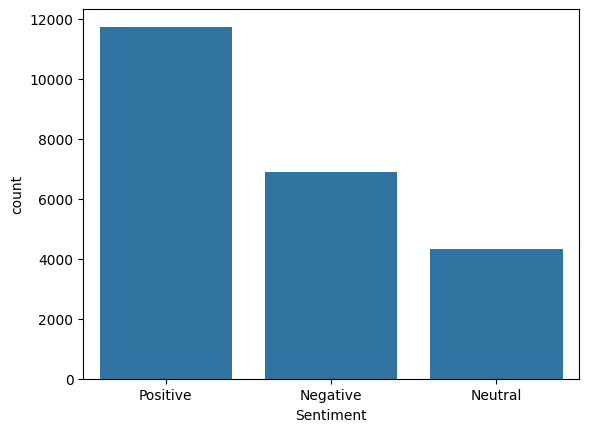

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Sentiment',data=data)
plt.show()

In [ ]:
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.Review,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

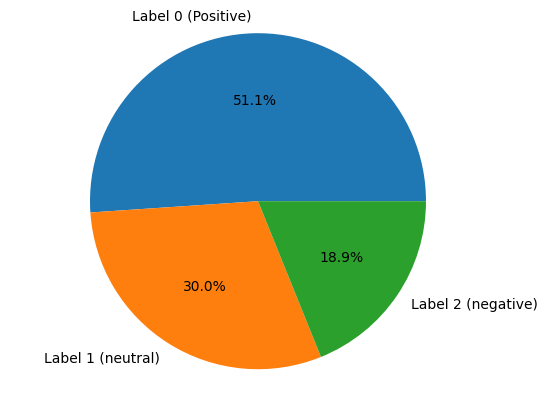

In [ ]:
plt.pie(data['Sentiment'].value_counts(),
        labels=['Label 0 (Positive)', 'Label 1 (neutral)','Label 2 (negative)'],
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
raw_text = [word for word_list in data['Tokens'] for word in word_list]
print(raw_text)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
top = Counter(raw_text)
print(top)
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

Counter({'skin': 19218, 'use': 16511, 'product': 15776, 'not': 15716, 'do': 10389, 'like': 8820, 'feel': 8008, 'good': 6158, 'face': 6147, 'really': 5413, 'get': 5201, 'well': 4922, 'love': 4840, 'make': 4826, 'would': 4809, 'dry': 4533, 'smell': 4401, 'try': 4386, 'one': 4033, 'work': 3862, 'I': 3739, 'm': 3733, 'look': 3468, 'see': 3432, 'go': 3415, 'day': 3339, 'great': 3308, 'cream': 3305, 'eye': 3301, 'time': 3203, 'also': 3133, 'leave': 2962, 'give': 2953, 'nice': 2900, 'much': 2852, 'buy': 2815, 'moisturizer': 2759, 'price': 2662, 'think': 2634, 'little': 2581, 'serum': 2576, 'apply': 2448, 'week': 2444, 'even': 2329, 'mask': 2308, 'recommend': 2194, 'long': 2179, 'notice': 2106, 'say': 2059, 'first': 2036, 'definitely': 1969, 'sensitive': 1931, 'result': 1923, 'help': 1905, 'hair': 1874, 'oily': 1858, 'scent': 1855, 'want': 1832, 'difference': 1806, 'acne': 1804, 'find': 1792, 'wash': 1791, 'review': 1772, 'makeup': 1754, 'texture': 1746, 'bottle': 1744, 'oil': 1741, 'be': 1727

,Common_words,count
0,skin,19218
1,use,16511
2,product,15776
3,not,15716
4,do,10389
5,like,8820
6,feel,8008
7,good,6158
8,face,6147
9,really,5413


In [ ]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

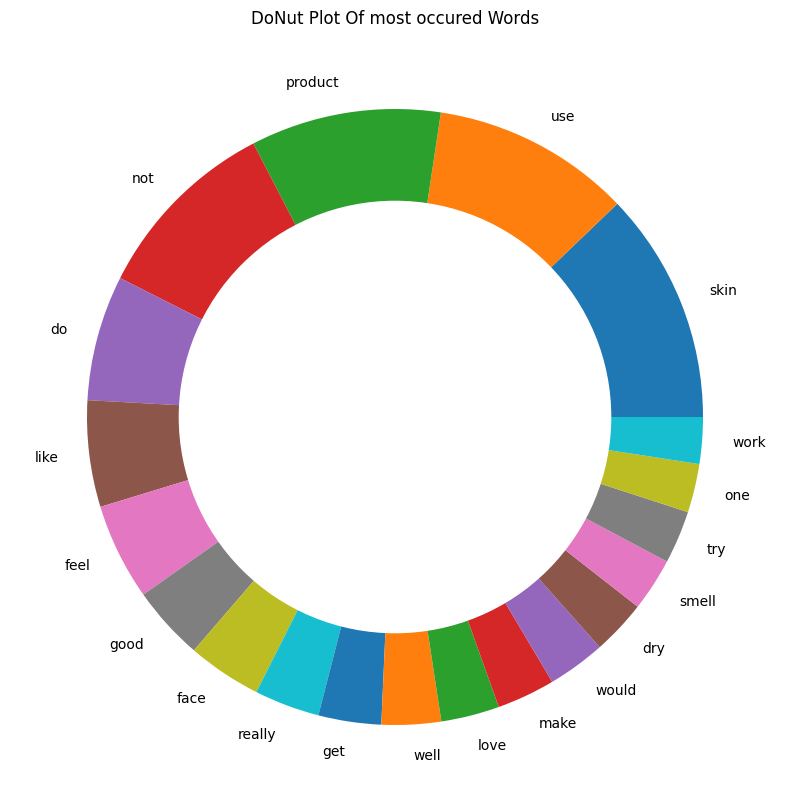

In [ ]:

plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(temp['count'], labels=temp['Common_words'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of most occured Words')
plt.show()

In [ ]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

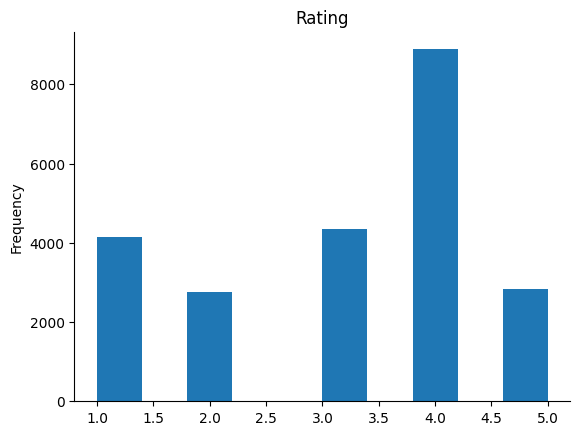

In [ ]:
from matplotlib import pyplot as plt
data['Rating'].plot(kind='hist', bins=10, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data1=data.copy()

In [ ]:
data1['review_len']=data1['Review'].apply(lambda x: len(x))
data1['word_count']=data1['Review'].apply(lambda x: len(x.split()))

In [ ]:
fig = px.histogram(data1, x="word_count", title="Review Text Length")
fig.show()

In [ ]:
fig = px.histogram(data1, x="review_len", title="Review Text Length")
fig.show()

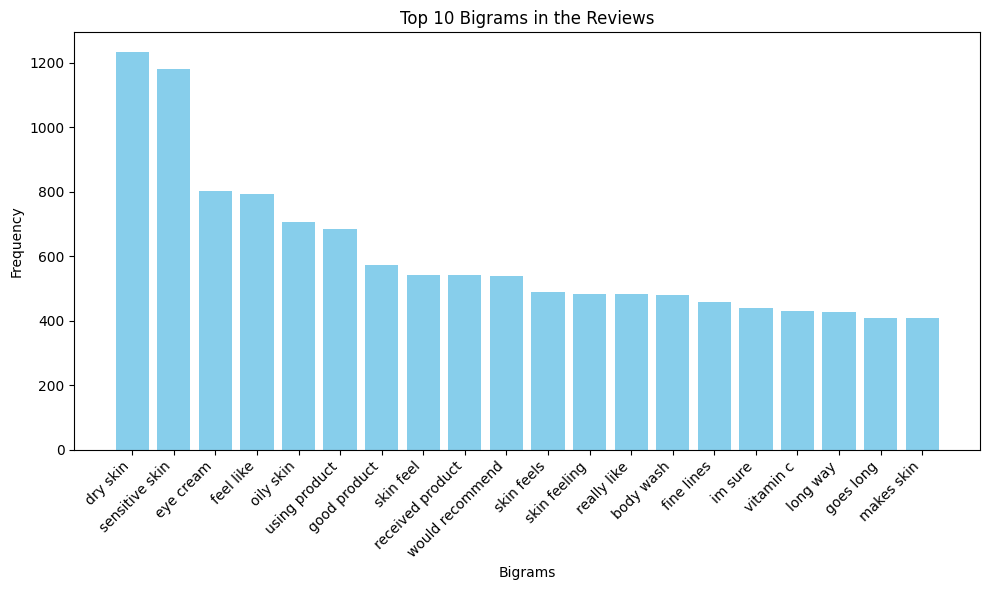

In [ ]:
from nltk import word_tokenize, bigrams
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the reviews
tokenized_reviews = [word_tokenize(review.lower()) for review in data['Review']]

# Generate bigrams from the tokenized reviews
all_bigrams = [bigram for review_tokens in tokenized_reviews for bigram in bigrams(review_tokens)]

# Count the occurrences of each bigram
bigram_counts = Counter(all_bigrams)

# Get the top 10 most common bigrams
top_bigrams = bigram_counts.most_common(20)

# Extract bigram and count values for plotting
bigrams, counts = zip(*top_bigrams)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(bigrams)), counts, tick_label=[f"{bigram[0]} {bigram[1]}" for bigram in bigrams], color='skyblue')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Bigrams in the Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

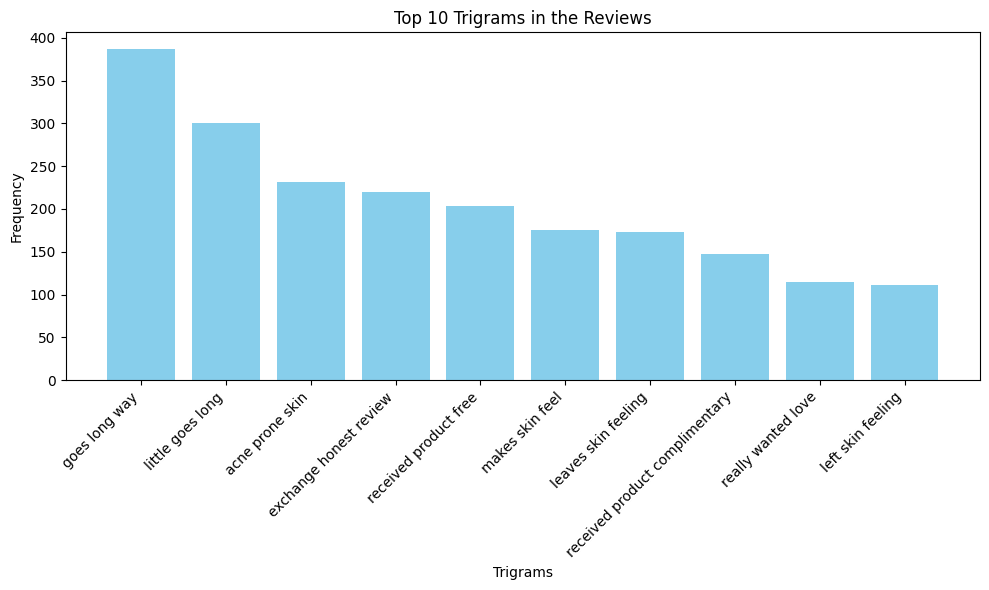

In [ ]:
from nltk import word_tokenize, ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the reviews
tokenized_reviews = [word_tokenize(review.lower()) for review in data['Review']]

# Generate trigrams from the tokenized reviews
all_trigrams = [trigram for review_tokens in tokenized_reviews for trigram in ngrams(review_tokens, 3)]

# Count the occurrences of each trigram
trigram_counts = Counter(all_trigrams)

# Get the top 10 most common trigrams
top_trigrams = trigram_counts.most_common(10)

# Extract trigram and count values for plotting
trigrams, counts = zip(*top_trigrams)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(trigrams)), counts, tick_label=[f"{trigram[0]} {trigram[1]} {trigram[2]}" for trigram in trigrams], color='skyblue')
plt.xlabel('Trigrams')
plt.ylabel('Frequency')
plt.title('Top 10 Trigrams in the Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


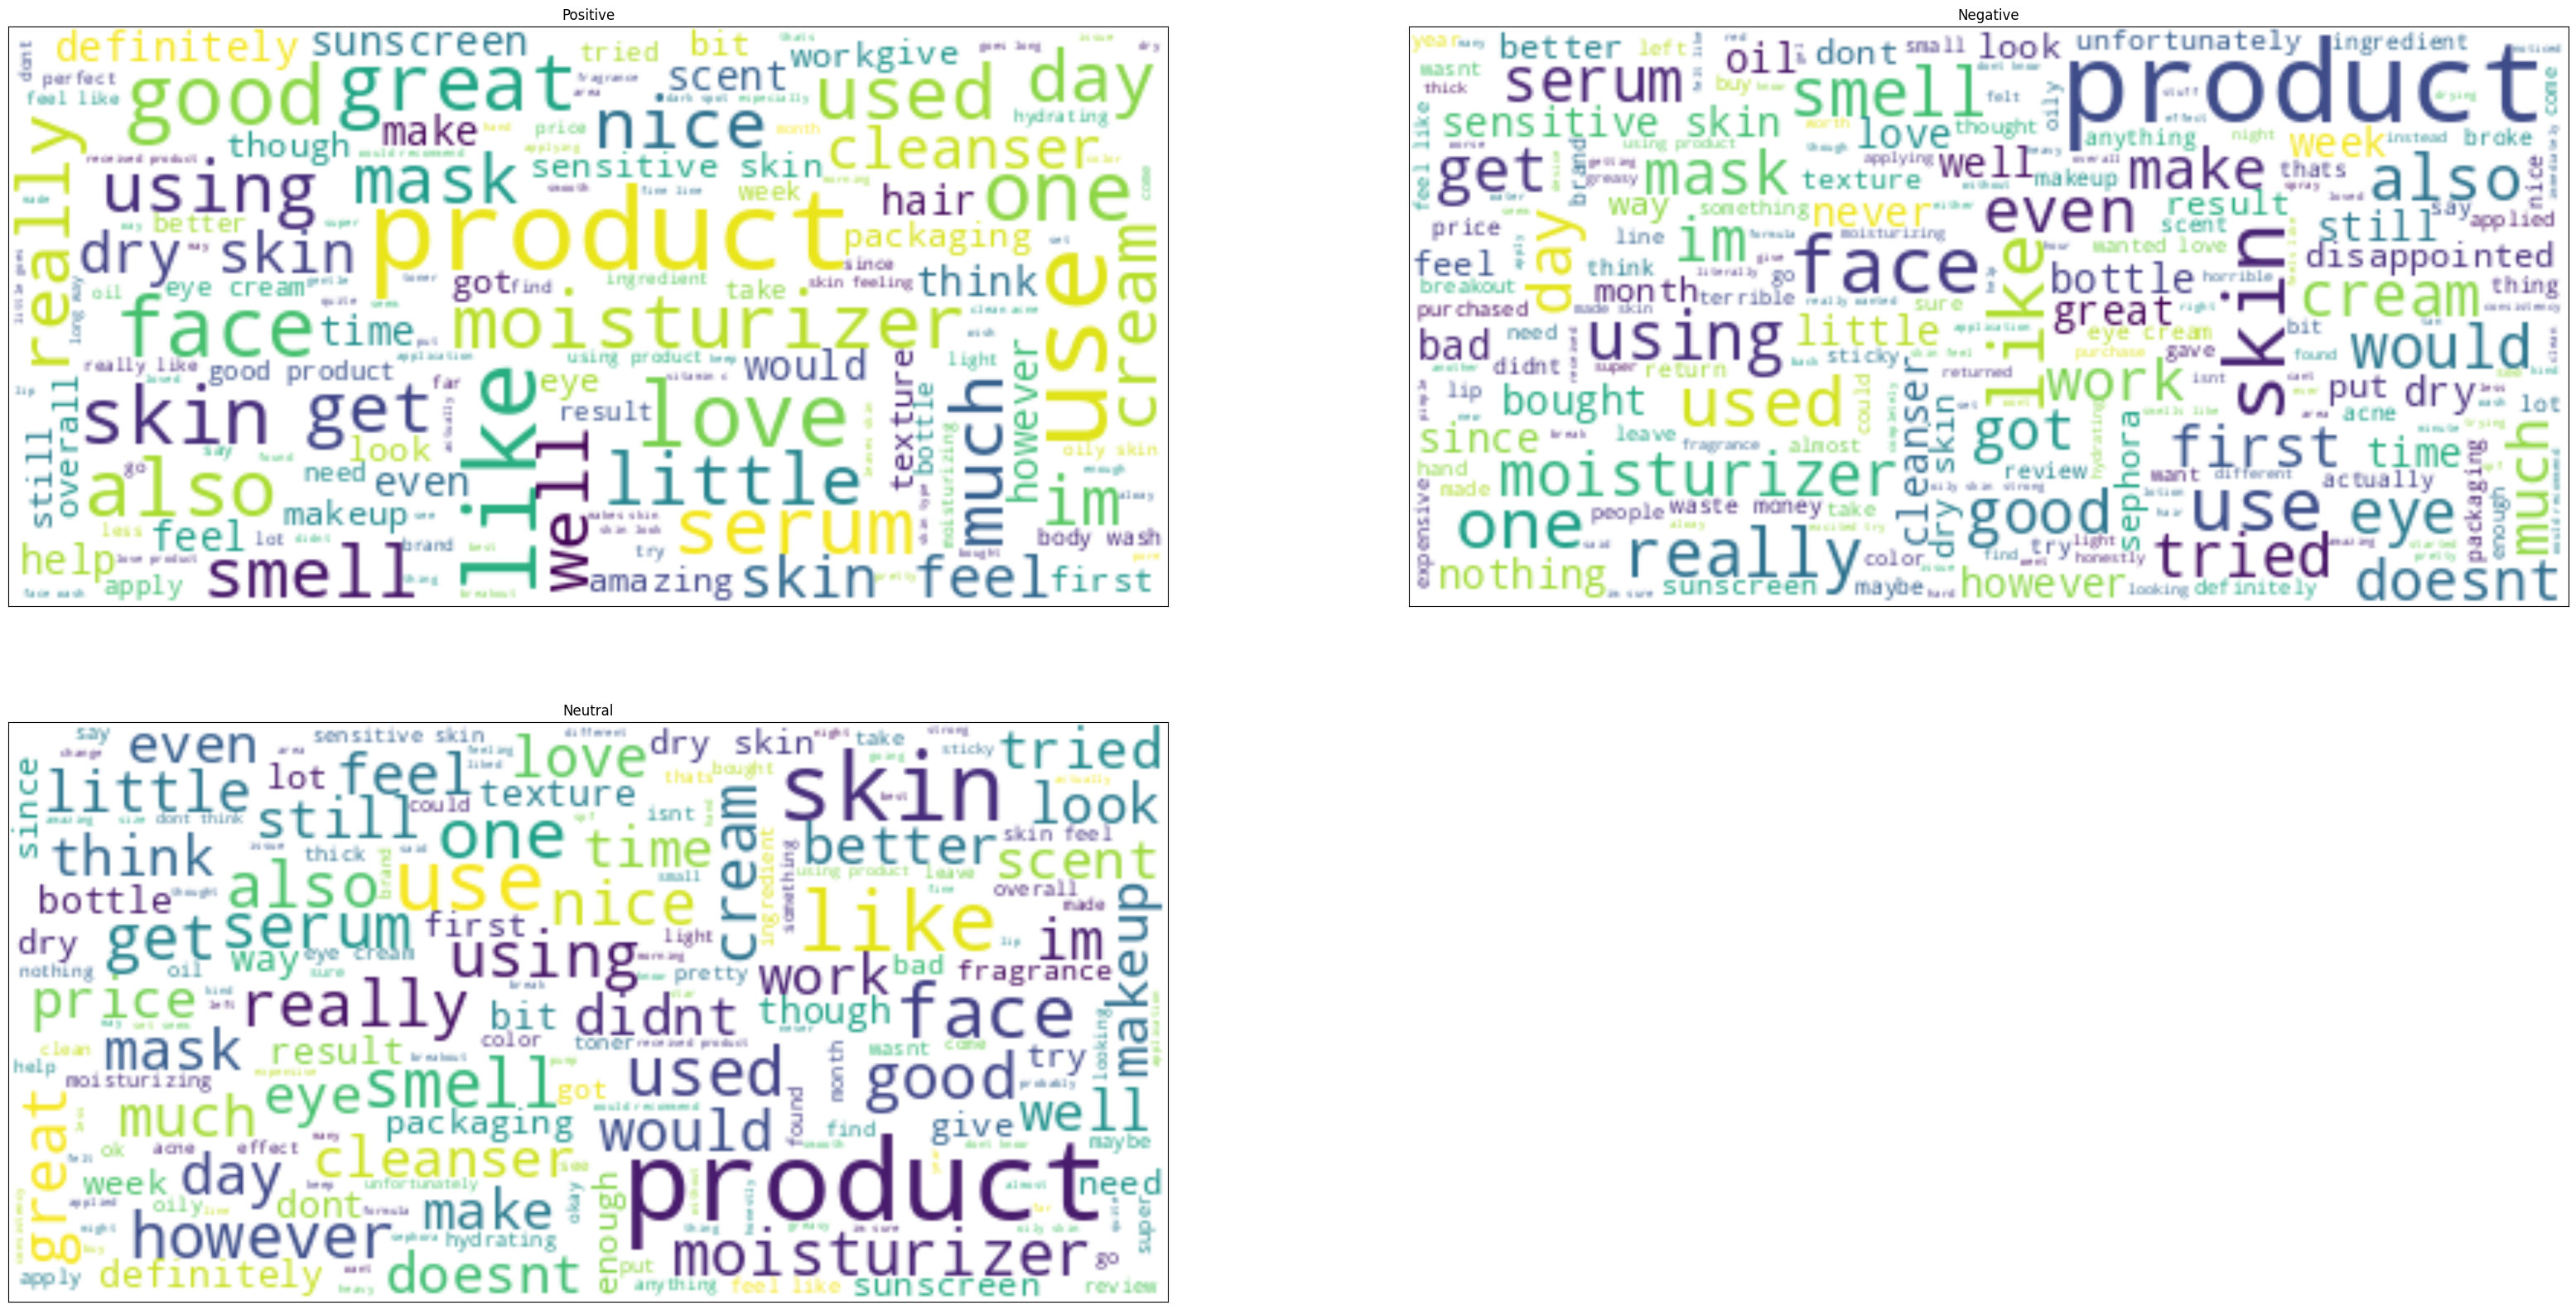

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

plt.figure(figsize=(40, 20))

# Iterate over unique sentiments
for index, sent in enumerate(data['Sentiment'].unique()):
    plt.subplot(2, 2, index + 1)
    # Get the reviews for the current sentiment
    df = data[data['Sentiment'] == sent]['Review']
    # Concatenate all reviews into a single string
    all_text = ' '.join(df)
    # Generate word cloud for the concatenated text
    wordcloud = WordCloud(background_color='white', stopwords=stopwords.words('english'), max_words=300, max_font_size=40).generate(all_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xticks([]), plt.yticks([])  # Hide tick marks
    plt.title(sent)

plt.show()
